第一部分: 

獲取數據進行 對數據的 特征抽取 

獲得 特征值 和 目標值

In [56]:
import pandas as pd

# 加載order_payments_dataset.csv文件
order_payments_df = pd.read_csv("C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_order_payments_dataset.csv")

# 加載orders_dataset.csv文件
orders_df = pd.read_csv("C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_orders_dataset.csv")

In [57]:
# 檢查每個數據框中的缺失值數量
print(order_payments_df.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [58]:
# 將缺失值標記為 'Unknown'
orders_df['order_delivered_customer_date'].fillna('Unknown', inplace=True)
orders_df['order_delivered_carrier_date'].fillna('Unknown', inplace=True)
orders_df['order_approved_at'].fillna('Unknown', inplace=True)

C:\Users\KK Chan\AppData\Local\Temp\ipykernel_10612\78815999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_customer_date'].fillna('Unknown', inplace=True)
C:\Users\KK Chan\AppData\Local\Temp\ipykernel_10612\78815999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [59]:
# 檢查是否包含任何重複的行
print(order_payments_df.duplicated().any())
print(orders_df.duplicated().any())

False
False


In [60]:
# 刪除列值不符合指定日期格式
orders_df = orders_df[orders_df['order_estimated_delivery_date'].str.contains('^\d{4}-\d{2}-\d{2}')]
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [61]:
orders_df.info()
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  obje

In [62]:
# 合併有關連的表格
tab1 = pd.merge(order_payments_df,orders_df,on=['order_id','order_id'])
tab1.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [63]:
tab1.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,Unknown,Unknown,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58,4c7f868f43b5cff577b0becb8c8b7860,delivered,2017-12-05 08:18:35,2017-12-06 02:50:09,2017-12-08 00:51:47,2018-02-05 14:59:09,2017-12-29 00:00:00


In [64]:
# 按照格式 轉換為日期時間型態（datetime）
tab1['order_purchase_timestamp'] = pd.to_datetime(tab1['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
tab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_sequential             103886 non-null  int64         
 2   payment_type                   103886 non-null  object        
 3   payment_installments           103886 non-null  int64         
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103886 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103886 non-null  object        
 9   order_delivered_carrier_date   103886 non-null  object        
 10  order_delivered_customer_date  103886 non-null  object        
 11  

In [65]:
# 按順序排列
tab1.sort_values(by='order_purchase_timestamp', ascending=True, inplace=True)
len(tab1)

103886

In [66]:
# 對對 payment_value 進行統計分析 生成一個新的摘要 DataFrame
df_total = tab1.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()
len(df_total)

458

In [67]:
# 創建一個新的 Series 對象
# 獲取每個時間點對應的 payment_value 值
# 可以方便地進行時間序列分析或者對 payment_value 進行可視化和統計計算
uni_data = df_total['payment_value']
uni_data.index = df_total['order_purchase_timestamp']
uni_data.head()

order_purchase_timestamp
2016-09-30     40.95
2016-10-20    136.23
2016-10-24     61.99
2016-10-25    109.34
2016-10-27     45.46
Name: payment_value, dtype: float64

In [68]:
uni_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 458 entries, 2016-09-30 to 2018-11-12
Series name: payment_value
Non-Null Count  Dtype  
--------------  -----  
458 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [69]:
# 由於後面的數據缺失嚴重 
# 所以只選取較為完整的前 420 個值
payment_values = uni_data[0:420].round(2).tolist()
len(payment_values)

420

array([<Axes: xlabel='order_purchase_timestamp'>], dtype=object)

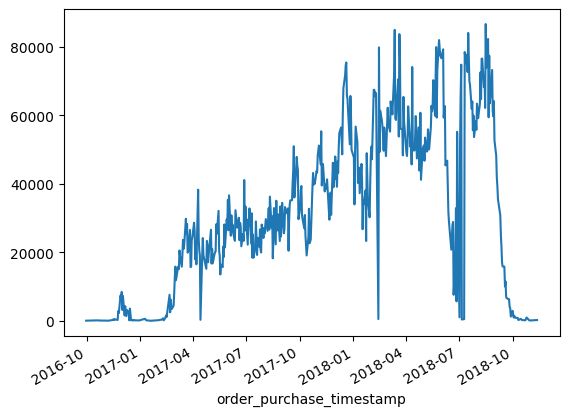

In [70]:
uni_data.plot(subplots=True)

第二部分:

建立LSTM模型 和 對數據 進行特征工程處理

In [71]:
from torch import nn


class RegLSTM(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers):
        super(RegLSTM, self).__init__()

        # 定義 LSTM 層和回歸層

        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers)  # rnn  LSTM 層
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim), # 線性層
            nn.Tanh(), # 激活函數
            nn.Linear(mid_dim, out_dim),  # 線性層
        )  

    def forward(self, x):
        
        # 模型的前向傳播
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)     
        seq_len, batch_size, hid_dim = y.shape
        y = y.view(-1, hid_dim)    # 對 y 進行形狀重塑，用於回歸層                        
        y = self.reg(y)   # 應用回歸層                                
        y = y.view(seq_len, batch_size, -1)  # 將 y 重新恢復原始形狀             
        return y

    """
    PyCharm Crtl+click nn.LSTM() jump to code of PyTorch:
    Examples::
        >>> rnn = nn.LSTM(10, 20, 2)
        >>> input = torch.randn(5, 3, 10)     
        # 5个时间步，也就是每个时间序列的长度是5,3表示一共有3个时间序列，10表示每个序列在每个时间步的维度是10
        >>> h0 = torch.randn(2, 3, 20)
        >>> c0 = torch.randn(2, 3, 20)
        >>> output, (hn, cn) = rnn(input, (h0, c0))
    """

    def output_y_hc(self, x, hc):

        y, hc = self.rnn(x, hc)  # y, (h, c) = self.rnn(x)

        seq_len, batch_size, hid_dim = y.size()
        y = y.view(-1, hid_dim)
        y = self.reg(y)
        y = y.view(seq_len, batch_size, -1)
        return y, hc

以上是一個稱為 `RegLSTM` 的類別，它繼承自 PyTorch 的 `nn.Module`。這個類別實現了一個包含 LSTM 層和回歸層的模型，用於回歸任務。

在模型的建構函式 `__init__` 中，我們初始化了 LSTM 層和回歸層。`self.rnn` 是一個 LSTM 層，

它接收大小為 `inp_dim` 的輸入，並輸出大小為 `mid_dim` 的中間狀態。

`self.reg` 是一個串聯的神經網路模型，包含了兩個線性層和一個激活函數 `nn.Tanh()`。

在前向傳播函式 `forward` 中，我們將輸入 `x` 傳遞到 LSTM 層 `self.rnn`，並獲取 LSTM 層的輸出 `y`。

接著，我們將 `y` 進行形狀重塑，以便通過回歸層 `self.reg` 進行回歸計算。

最後，我們再次將 `y` 轉回原始的形狀，並將結果返回。

`output_y_hc` 方法接收輸入 `x` 和隱藏狀態 `hc`，並返回模型的預測結果 `y` 和更新後的隱藏狀態 `hc`。

在這個方法中，我們直接將 `x` 和 `hc` 傳遞給 `self.rnn`，並獲取 LSTM 層的輸出 `y` 和更新後的隱藏狀態 `hc`。

之後，進行與 `forward` 方法相同的操作，將 `y` 進行形狀重塑、回歸計算，最後將 `y` 再次轉換

In [72]:
import numpy as np


def minmaxscaler(x):
    """
    最小-最大歸一化函式
    
    Args:
        x (ndarray): 輸入的數組
        
    Returns:
        ndarray: 歸一化後的數組
        tuple: 最小值和最大值的元組
    """ 
    minx = np.amin(x)
    maxx = np.amax(x)
    return (x - minx)/(maxx - minx), (minx, maxx)

def preminmaxscaler(x, minx, maxx):
    """
    預處理最小-最大歸一化函式
    
    Args:
        x (ndarray): 輸入的數組
        minx (float): 最小值
        maxx (float): 最大值
        
    Returns:
        ndarray: 預處理的歸一化數組
    """
    return (x - minx)/(maxx - minx)

def unminmaxscaler(x, minx, maxx):
    """
    反向最小-最大歸一化函式
    
    Args:
        x (ndarray): 輸入的數組
        minx (float): 最小值
        maxx (float): 最大值
        
    Returns:
        ndarray: 反向歸一化後的數組
    """
    return x * (maxx - minx) + minx

這些函式的應用包括數據預處理、特徵縮放等。

最小-最大歸一化可以將數據映射到一個指定的範圍內，使得數據分佈更加均勻，減少不同特徵之間的尺度差異。

In [73]:
import torch

# 將 payment_values 轉換為 NumPy 數組
bchain = np.array(payment_values)
bchain = bchain[:, np.newaxis]

# 定義維度參數
inp_dim = 1
out_dim = 1
mid_dim = 8
mid_layers = 1

# 提取輸入和輸出數據
data_x = bchain[:-1, :]
data_y = bchain[+1:, :]

# 定義訓練數據集的大小
train_size = 400

# 提取訓練數據
train_x = data_x[:train_size, :]
train_y = data_y[:train_size, :]


# 對訓練數據進行最小-最大歸一化處理
train_x, train_x_minmax = minmaxscaler(train_x)
train_y, train_y_minmax = minmaxscaler(train_y)

# 硬件設置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

此段代碼的目的是將 payment_values 數據準備成神經網絡模型所需的格式，並對數據進行最小-最大歸一化的預處理。

In [74]:
batch_x = train_x[:, np.newaxis, :]
batch_y = train_y[:, np.newaxis, :]
batch_x = torch.tensor(batch_x, dtype=torch.float32, device=device)
batch_y = torch.tensor(batch_y, dtype=torch.float32, device=device)

這段代碼的目的是 將訓練數據轉換為神經網絡模型所需的形狀和數據類型，並將數據移動到指定的設備上。

第三部分:

訓練模型 

並以 .pth 存儲 

In [79]:
# 加載模型
model = RegLSTM(inp_dim, out_dim, mid_dim, mid_layers).to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 開始訓練
print("Training......")
for e in range(801):
    out = model(batch_x) # 用模型進行預測，獲得輸出值

    Loss = loss(out, batch_y) # 計算預測值和目標值之間的均方誤差損失

    optimizer.zero_grad() # 清零優化器的梯度
    Loss.backward() # 反向傳播計算梯度
    optimizer.step() # 更新模型參數

    if e % 10 == 0:
        # 每隔 10 輪訓練，輸出當前的訓練輪數和損失值
        print('Epoch: {:4}, Loss: {:.5f}'.format(e, Loss.item()))

# 儲存模型
torch.save(model.state_dict(), './net.pth')
print("Save in:", './net.pth')

Training......
Epoch:    0, Loss: 0.07364
Epoch:   10, Loss: 0.04783
Epoch:   20, Loss: 0.01981
Epoch:   30, Loss: 0.01546
Epoch:   40, Loss: 0.01375
Epoch:   50, Loss: 0.01331
Epoch:   60, Loss: 0.01315
Epoch:   70, Loss: 0.01304
Epoch:   80, Loss: 0.01296
Epoch:   90, Loss: 0.01289
Epoch:  100, Loss: 0.01282
Epoch:  110, Loss: 0.01276
Epoch:  120, Loss: 0.01270
Epoch:  130, Loss: 0.01265
Epoch:  140, Loss: 0.01259
Epoch:  150, Loss: 0.01255
Epoch:  160, Loss: 0.01251
Epoch:  170, Loss: 0.01247
Epoch:  180, Loss: 0.01243
Epoch:  190, Loss: 0.01239
Epoch:  200, Loss: 0.01234
Epoch:  210, Loss: 0.01227
Epoch:  220, Loss: 0.01216
Epoch:  230, Loss: 0.01198
Epoch:  240, Loss: 0.01176
Epoch:  250, Loss: 0.01152
Epoch:  260, Loss: 0.01103
Epoch:  270, Loss: 0.01059
Epoch:  280, Loss: 0.01054
Epoch:  290, Loss: 0.01062
Epoch:  300, Loss: 0.01059
Epoch:  310, Loss: 0.01018
Epoch:  320, Loss: 0.01010
Epoch:  330, Loss: 0.00979
Epoch:  340, Loss: 0.00951
Epoch:  350, Loss: 0.00924
Epoch:  360, 

In [80]:
# 創建新數據
new_data_x = data_x.copy()
new_data_x[train_size:] = 5

# 定義測試序列的長度
test_len = 40

# 定義評估序列的大小
eval_size = 1

# 創建張量 元素值均為 0
zero_ten = torch.zeros((mid_layers, eval_size, mid_dim), dtype=torch.float32, device=device)

for i in range(train_size, len(new_data_x)):  # 要预测的是i
    test_x = new_data_x[i-test_len:i, np.newaxis, :]
    test_x = preminmaxscaler(test_x, train_x_minmax[0], train_x_minmax[1])
    batch_test_x = torch.tensor(test_x, dtype=torch.float32, device=device)

    if i == train_size:
        test_y, hc = model.output_y_hc(batch_test_x, (zero_ten, zero_ten))
    else:
        test_y, hc = model.output_y_hc(batch_test_x[-2:], hc)
    test_y = model(batch_test_x)
    predict_y = test_y[-1].item()
    predict_y = unminmaxscaler(predict_y, train_x_minmax[0], train_y_minmax[1])
    new_data_x[i] = predict_y

以上代碼目的是 創建新數據、設置測試序列和評估序列的大小，

以及對測試序列進行預處理、特徵縮放和預測等操作。

最終，預測的結果被添加到 'new_data_x' 中，用於後續的應用。

第四部分:

對預測的數據進行可視化

In [ ]:
from matplotlib import pyplot as plt
"""
得到預測的數據後
使用matplotlib 
將預測結果進行可視化
"""
plt.figure(figsize=(20, 8))
plt.plot(new_data_x, 'g', label='pred')
plt.plot(data_x, 'r', label='real', alpha=0.3)
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(new_data_x, 'g', label='pred')
plt.plot(data_x, 'o', label='real', alpha=0.3)
plt.legend(loc='best')